# Task
First load the dataset in a notebook and preprocess it. Then use visualisations to address the following questions:

- Which states have the most sales?
- What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)
- Who is an outstanding customer in New York?
- Are there any differences among states in profitability?
- The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)
- What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)
- What are the Top 20 customers by Sales?
- Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?
- Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.

In [48]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from plotnine import * 
import plotly.express as px
import datetime 
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('/Users/teitelbaumsair/Desktop/DI_Bootcamp/W5/D5/Mini Project/US Superstore data.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,21/01/2014,23/01/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [49]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [50]:
df.isna().sum() # check missing values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [51]:
df.duplicated().sum() # 0

np.int64(0)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

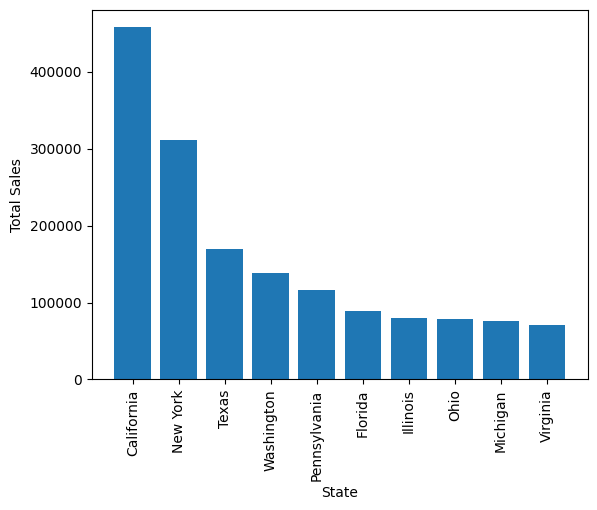

In [53]:
#Show the top 10 staes with the most sales
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df['Sales'].max()

top_10_states = df.groupby('State').sum()['Sales'].sort_values(ascending=False).head(10)

plt.bar(top_10_states.index, top_10_states.values)
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation='vertical')
plt.show()


In [54]:
# What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)
state_metrics = df.groupby("State")[["Sales", "Profit"]].sum()

comparison = state_metrics.loc[["California", "New York"]]
comparison


,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486


In [55]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [56]:
difference = comparison.loc["New York"] - comparison.loc["California"]
difference

Sales    -146811.3605
Profit     -2342.8385
dtype: float64

In [ ]:
#Who is an outstanding customer in New York?
top_10_customers = df[df['State'] == 'New York'].groupby(['Customer ID', 'Customer Name']).sum()['Sales'].sort_values(ascending=False).head(10)
top_10_customers

#could also do feature ranking by sales (not replacing but adding another column to make the data more granular)

Customer ID  Customer Name   
TA-21385     Tom Ashbrook        13723.498
PF-19120     Peter Fuller         7678.228
SV-20365     Seth Vernon          7359.918
TB-21400     Tom Boeckenhauer     6999.960
GT-14710     Greg Tran            6712.744
TS-21370     Todd Sumrall         6492.314
KD-16270     Karen Daniels        6241.282
KD-16495     Keith Dawkins        5854.194
LW-17215     Luke Weiss           5048.186
CJ-12010     Caroline Jumper      5012.760
Name: Sales, dtype: float64

In [64]:
# Are there any differences among states in profitability?
State_Profit = df.groupby('State').sum()['Profit'].sort_values(ascending=False).head(10)
State_Profit


State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

In [ ]:
#  The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)

df['Profit'] = df['Sales'] * 0.2
total_profit = df['Profit'].sum()

df = df.sort_values(by='Profit', ascending=False)
df['cumulative_profit_percentage'] = df['Profit'].cumsum() / total_profit * 100

top_20_percent_customers = df.head(int(len(df) * 0.2))  # Top 20% of customers
total_top_20_profit_percentage = top_20_percent_customers['cumulative_profit_percentage'].iloc[-1]

total_top_20_profit_percentage

np.float64(77.93369748983105)

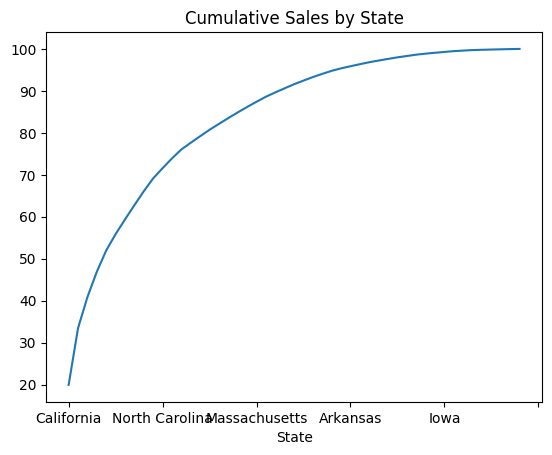

In [96]:
Sales_by_State = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
Sales_by_City = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

cumulative_sales_state = Sales_by_State.cumsum()
cumulative_percentage_state = cumulative_sales_state / cumulative_sales_state.iloc[-1] * 100
cumulative_percentage_state.plot(kind='line', title='Cumulative Sales by State')
plt.show()

<Axes: title={'center': 'Top 20 Cities by Sales'}, xlabel='City'>

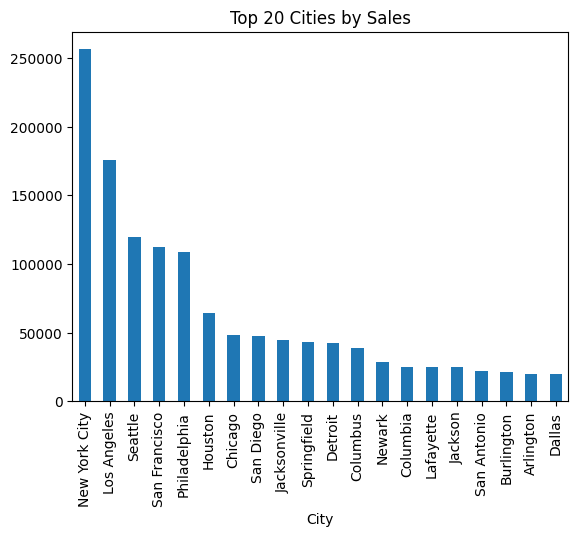

In [81]:
# What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)

top_20_cities_sales = df.groupby('City').sum()['Sales'].sort_values(ascending=False).head(20)
top_20_cities_sales.plot(kind='bar', title='Top 20 Cities by Sales')


<Axes: xlabel='City'>

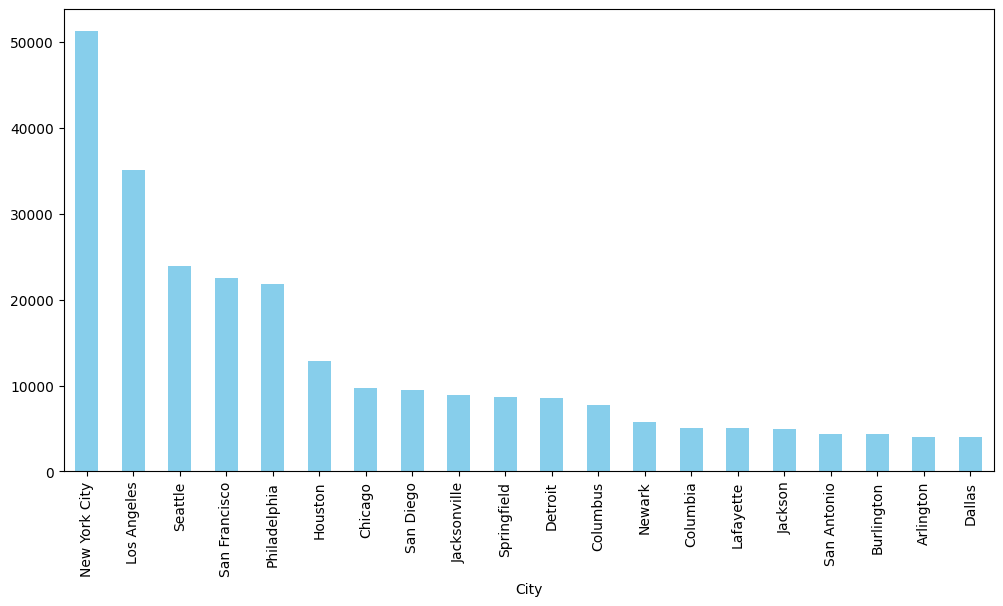

In [79]:
top_20_cities_profit = df.groupby('City').sum()['Profit'].sort_values(ascending=False).head(20)
top_20_cities_profit.plot(kind='bar', figsize=(12, 6), color='skyblue') 


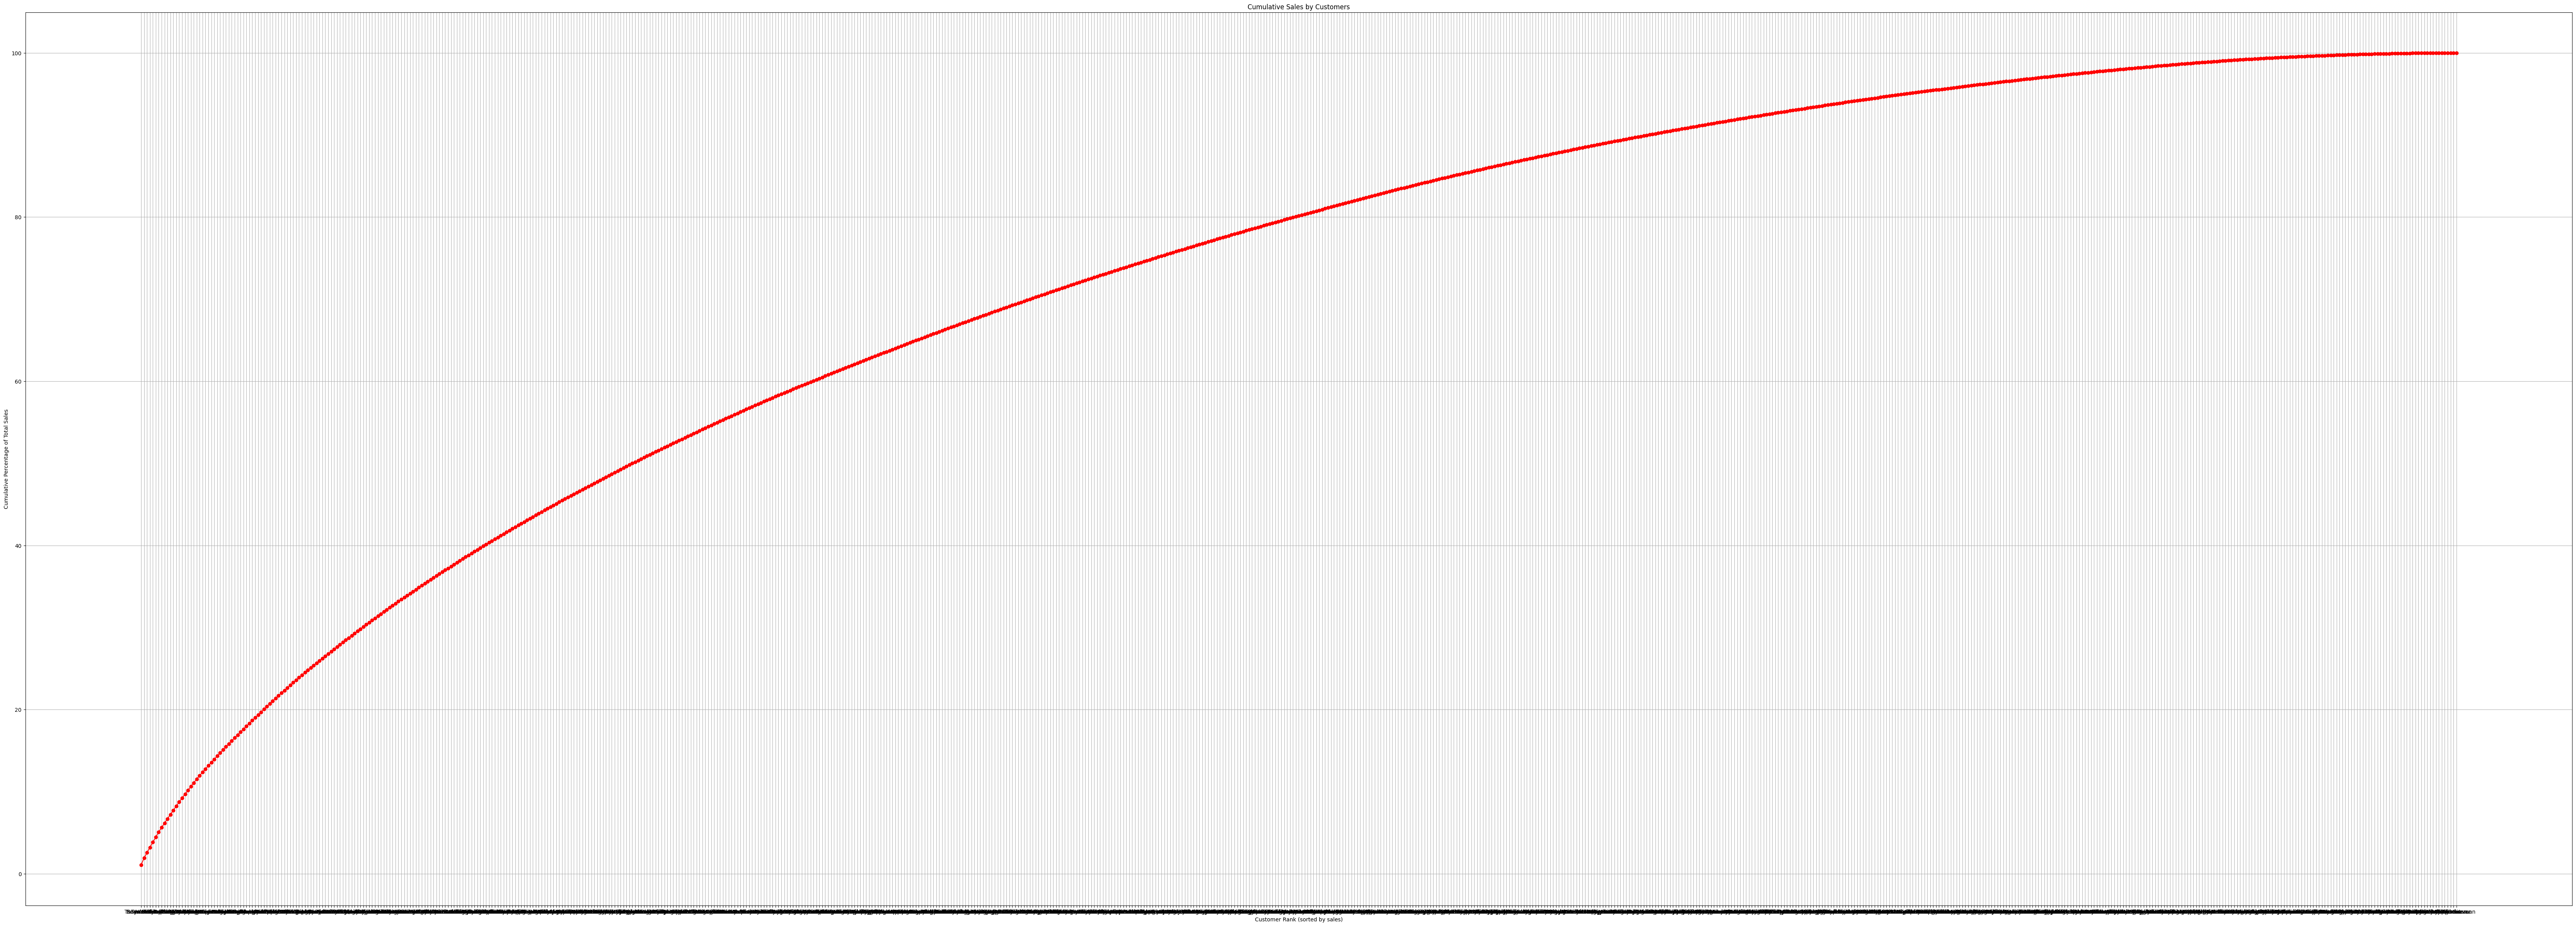

In [ ]:
# Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?
Sales_by_Customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
cumulative_sales = Sales_by_Customers.cumsum()
cumulative_percentage = cumulative_sales / cumulative_sales.iloc[-1] * 100

plt.figure(figsize=(85, 30))
plt.plot(cumulative_percentage, marker='o', linestyle='-', color='red')
plt.title('Cumulative Sales by Customers')
plt.xlabel('Customer Rank (sorted by sales)')
plt.ylabel('Cumulative Percentage of Total Sales')
plt.grid()
plt.show()

#Add indication of where the 80% is.

#Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.

